In [101]:
#Import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
tweet_df = pd.read_csv('uhurukenyattatweets.csv')

In [105]:
tweet_df

,Tweet,Intention
0,@DanOjowa When Uhuru Kenyatta appointed Moody ...,0
1,@edutheguru @PolycarpHinga Kwenda huko. Reject...,0
2,@Nesh_maina I miss Uhuru Kenyatta,0
3,@citizentvkenya This too much I think this reg...,0
4,@OleItumbi @WilliamsRuto @OleItumbi just to le...,0
...,...,...
12045,"'Black','Maroon','black/white', 'jungle green'...",1
12046,"Guys we are back, get 3-5 games and pay just k...",1
12047,"Guys we are back, get 3-5 games and pay just k...",1
12048,"Guys we are back, get 3-5 games and pay just k...",1


In [106]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12050 entries, 0 to 12049
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      12050 non-null  object
 1   Intention  12050 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 188.4+ KB


In [107]:
tweet_df['Intention'].value_counts()

1    6030
0    6020
Name: Intention, dtype: int64

In [108]:
tweet_df.shape

(12050, 2)

In [109]:
#Check if there are any non values in the columns
tweet_df.isnull().any()

Tweet        False
Intention    False
dtype: bool

# Data Pre-Processing

In [110]:
#Define the preprocessing function
def PreprocessTweet(tweet):
    tweet = re.sub(r'http\S+','',tweet) #Remove URLs
    tweet = re.sub(r'^RT[\s]+','',tweet) #Remove Retweets
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet) #Remove User mentions
    tweet = re.sub(r'#','',tweet)# Remove hashtags
    tweet = re.sub(r'[^\w\s]','',tweet) #Remove punctuation and special characters
    tweet = tweet.lower()#Convert to lowercase
    tweet = re.sub(r'[^a-zA-Z]+', ' ', tweet) #Removing numbers
    
    tokens = word_tokenize(tweet)
    stop_words = set(stopwords.words('english'))
    filtered_tweets = [t for t in tokens if t not in stop_words]
    return " ".join(filtered_tweets) 


In [111]:
tweet_df.Tweet = tweet_df['Tweet'].apply(PreprocessTweet)

In [112]:
tweet_df.Tweet

0        uhuru kenyatta appointed moody aworiwere blind...
1        kwenda huko rejected uhuru kenyatta coming bac...
2                                maina miss uhuru kenyatta
3        much think regime doesnt anything associated u...
4        let know uhuru kenyatta recognized globally ru...
                               ...                        
12045    blackmaroonblackwhite jungle green white still...
12046    guys back get games pay ksh win whatsapp ruto ...
12047    guys back get games pay ksh win whatsapp ruto ...
12048    guys back get games pay ksh win whatsapp ruto ...
12049    guys back get games pay ksh win whatsapp ruto ...
Name: Tweet, Length: 12050, dtype: object

In [113]:
print(tweet_df.isnull().any())

Tweet        False
Intention    False
dtype: bool


In [114]:
tweet_df.duplicated().any()

True

In [115]:
tweet_df = tweet_df.drop_duplicates('Tweet')

In [116]:
tweet_df.duplicated().any()


False

In [117]:
tweet_df['Intention'].value_counts()

0    5350
1    5274
Name: Intention, dtype: int64

In [118]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [120]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Maria
[nltk_data]     Gichomo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [121]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [122]:
tweet_df.loc[:,'Tweet'] = tweet_df['Tweet'].apply(lambda x: lemmatizing(x))

C:\Users\Maria Gichomo\AppData\Local\Temp\ipykernel_17028\3247150641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df.loc[:,'Tweet'] = tweet_df['Tweet'].apply(lambda x: lemmatizing(x))


# Visualization of the distribution of classes

<AxesSubplot:xlabel='Intention', ylabel='count'>

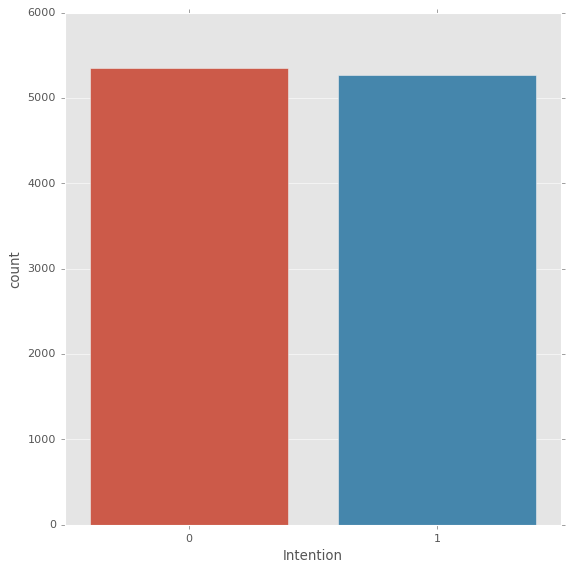

In [123]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x='Intention', data = tweet_df)

Text(0.5, 1.0, 'Distribution of Classes')

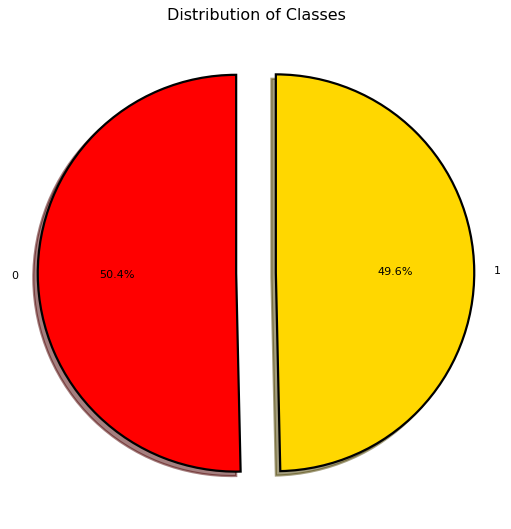

In [124]:
fig = plt.figure(figsize=(8,8))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['Intention'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of Classes')

# WordCloud

In [125]:
Relevant_tweets = tweet_df[tweet_df.Intention == 0]
Relevant_tweets.head()

,Tweet,Intention
0,uhuru kenyatta appointed moody aworiwere blind...,0
1,kwenda huko rejected uhuru kenyatta coming bac...,0
2,maina miss uhuru kenyatta,0
3,much think regime doesnt anything associated u...,0
4,let know uhuru kenyatta recognized globally ru...,0


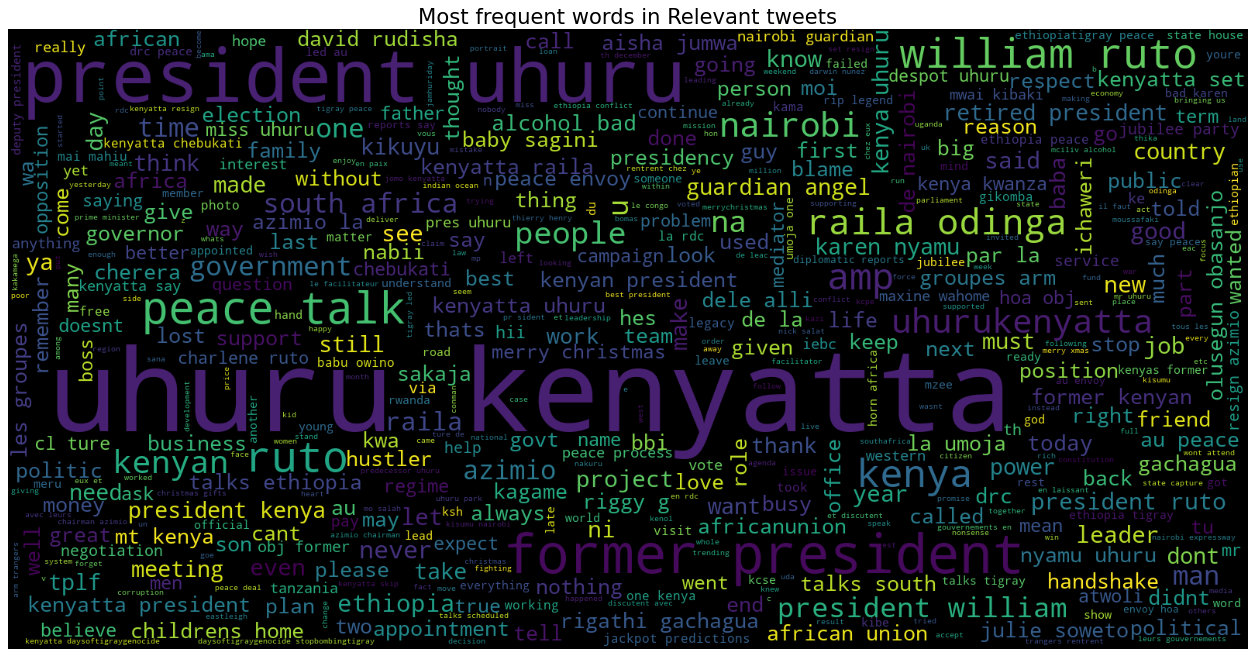

In [129]:
text = ' '.join([word for word in Relevant_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, random_state=42).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Relevant tweets', fontsize = 19)
plt.show()

In [130]:
Irrelevant_tweets = tweet_df[tweet_df.Intention == 1]
Irrelevant_tweets.head()

,Tweet,Intention
31,talked niece today adwa market n forces lootin...,1
62,cost ksh withdraw ksh bank account via mobile ...,1
64,consumers hit electricity price shock january ...,1
72,consumers hit electricity price shock january ...,1
74,keenly designed fit car seats leather suede de...,1


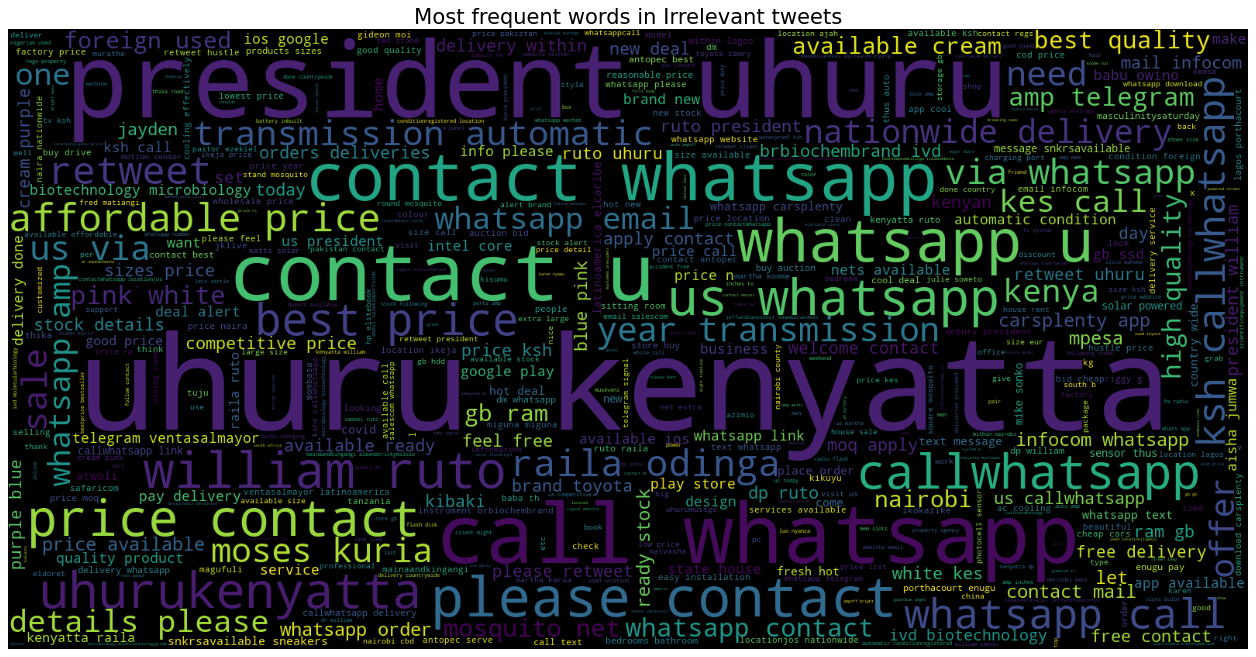

In [131]:
text = ' '.join([word for word in Irrelevant_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, random_state = 42).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Irrelevant tweets', fontsize = 19)
plt.show()

# Vectorization

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [134]:
v = TfidfVectorizer()
transformed_output = v.fit_transform(tweet_df['Tweet'])
print(v.vocabulary_)

{'uhuru': 23731, 'kenyatta': 11821, 'appointed': 1263, 'moody': 14998, 'aworiwere': 1781, 'blind': 2613, 'retiree': 19521, 'kwenda': 12682, 'huko': 9934, 'rejected': 19202, 'coming': 4350, 'back': 1870, 'haunt': 9404, 'big': 2433, 'time': 22956, 'kula': 12536, 'taabu': 22296, 'na': 15519, 'uwogo': 24307, 'pole': 17858, 'wacha': 24750, 'upuzi': 24162, 'maina': 13756, 'miss': 14708, 'much': 15200, 'think': 22787, 'regime': 19155, 'doesnt': 6164, 'anything': 1188, 'associated': 1525, 'delivering': 5533, 'nothing': 16184, 'kenyans': 11790, 'concentrating': 4494, 'witchhunt': 25457, 'let': 13081, 'know': 12343, 'recognized': 19041, 'globally': 8720, 'ruto': 19956, 'give': 8680, 'us': 24190, 'break': 2931, 'cheap': 3773, 'childish': 3889, 'politics': 17880, 'president': 18146, 'au': 1642, 'william': 25384, 'uwongo': 24308, 'kama': 11529, 'ni': 15943, 'previous': 18201, 'government': 8858, 'hatungeiona': 9396, 'tukiwa': 23487, 'sober': 21279, 'speaker': 21508, 'kingi': 12192, 'tells': 22545, 

In [135]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    indx = v.vocabulary_.get(word)
    print(f"{word} {v.idf_[indx]}")

aa 8.661527081358518
aaba 9.577817813232672
aache 9.577817813232672
aah 9.577817813232672
aamirkhan 9.577817813232672
aan 9.577817813232672
aanze 9.577817813232672
aawayhee 9.577817813232672
aayana 9.577817813232672
ab 9.172352705124508
aba 8.191523452112783
ababa 8.479205524564563
ababu 7.380593235896453
abad 9.577817813232672
abadilisha 9.577817813232672
abaga 9.172352705124508
abahuza 9.172352705124508
abamotsi 9.577817813232672
abandon 8.884670632672726
abandoned 8.191523452112783
abanega 8.479205524564563
abantu 9.172352705124508
abanyecongo 9.577817813232672
abanyekongo 9.577817813232672
abashyitsi 9.577817813232672
abb 9.577817813232672
abbas 9.577817813232672
abby 9.172352705124508
abbycom 8.479205524564563
abbyliutradecn 9.577817813232672
abcrunchhammer 9.577817813232672
abdallah 9.577817813232672
abdi 9.172352705124508
abdille 8.661527081358518
abducted 8.661527081358518
abdul 8.884670632672726
abdulaziz 9.577817813232672
abdulazizautos 7.562914792690408
abdulle 9.57781781323

af 8.191523452112783
afanye 9.577817813232672
afathali 9.577817813232672
afenifere 9.577817813232672
afew 9.577817813232672
affair 8.661527081358518
affaire 9.172352705124508
affairs 8.191523452112783
affairsbut 9.577817813232672
affect 9.172352705124508
affected 9.172352705124508
affecting 8.884670632672726
affidavits 9.577817813232672
affiliate 9.577817813232672
affiliates 9.577817813232672
affiliation 9.172352705124508
affirme 9.577817813232672
affluence 9.577817813232672
affluent 9.577817813232672
afford 8.661527081358518
affordability 8.479205524564563
affordable 4.854864591588198
affordabletextcall 8.191523452112783
affordablethis 9.577817813232672
afghanistan 8.884670632672726
afin 9.172352705124508
afisa 9.577817813232672
aflatoion 9.577817813232672
afloat 9.577817813232672
afraid 8.073740416456399
africa 4.376562159527767
africaaheromanchester 9.577817813232672
africadjiboutiuntanzaniausukfrancemoronicomorosspainportugalguatemalacityhondurasnicaraguael 9.577817813232672
africa

amber 8.479205524564563
ambigu 9.577817813232672
ambition 9.577817813232672
ambitions 9.577817813232672
ambitious 9.577817813232672
ambivert 9.172352705124508
ambode 8.884670632672726
amboseli 9.577817813232672
amboye 9.577817813232672
ambrose 9.172352705124508
ambuku 9.172352705124508
amc 9.172352705124508
amd 8.479205524564563
ame 9.577817813232672
ameambiwa 9.577817813232672
ameanza 9.577817813232672
amecheza 9.577817813232672
amechoka 9.172352705124508
amechomoka 9.577817813232672
ameelewa 9.577817813232672
ameenda 9.577817813232672
ameextend 9.577817813232672
amegurumisha 9.577817813232672
ameharibu 9.577817813232672
ameicram 9.577817813232672
amejaa 9.577817813232672
amejitetea 9.577817813232672
amejua 9.577817813232672
amekataa 8.325054844737306
amekipokea 9.577817813232672
amekopa 9.577817813232672
amekua 9.577817813232672
amekula 9.577817813232672
amekuwa 9.172352705124508
amemea 9.577817813232672
amemlea 9.577817813232672
amemtaja 9.577817813232672
amemwambia 9.57781781323267

arrow 8.884670632672726
arsavl 9.577817813232672
arsenal 6.903669163806144
arshad 9.577817813232672
arslei 8.884670632672726
arsliv 8.073740416456399
arsmun 9.577817813232672
arsoly 8.661527081358518
art 7.275232720238627
artcaffe 9.577817813232672
arteta 7.706015636331081
artetamo 9.172352705124508
artful 9.577817813232672
artha 9.577817813232672
arthur 9.172352705124508
article 8.073740416456399
articulate 9.577817813232672
artificial 8.191523452112783
artificialgrass 9.577817813232672
artificialgreenery 9.577817813232672
artificialhedge 9.577817813232672
artificialplant 9.577817813232672
artificialplantwall 9.577817813232672
artificialturf 9.577817813232672
artifiedscom 9.172352705124508
artist 8.884670632672726
artistic 8.884670632672726
artisticmillinersrapecase 9.172352705124508
artists 9.577817813232672
arts 9.577817813232672
artstv 9.577817813232672
artwork 8.479205524564563
arvs 9.577817813232672
arwa 9.577817813232672
ary 8.325054844737306
asa 9.577817813232672
asad 8.3250548

bamboo 9.172352705124508
bamburi 8.479205524564563
bamy 9.577817813232672
ban 9.577817813232672
bana 8.325054844737306
banaa 9.577817813232672
banana 7.968379900798572
bananabii 9.577817813232672
bananas 9.577817813232672
band 8.479205524564563
banda 8.884670632672726
bandana 9.172352705124508
bande 9.577817813232672
bandhej 9.577817813232672
banding 9.577817813232672
bandits 8.884670632672726
bands 9.577817813232672
bandwagon 8.884670632672726
bang 9.577817813232672
bangaizareloaded 9.172352705124508
bangi 9.577817813232672
bangtanthe 9.577817813232672
bank 6.5820855396786815
bankantony 9.172352705124508
banking 8.884670632672726
bankmanfried 9.577817813232672
banknifty 9.577817813232672
bankrupt 9.577817813232672
bankruptcy 9.577817813232672
banku 9.577817813232672
bankusukdelta 9.577817813232672
banned 9.577817813232672
banner 9.577817813232672
bannerman 9.577817813232672
banning 9.577817813232672
bano 9.577817813232672
banplasticbottles 9.577817813232672
banquet 9.577817813232672
b

bikelife 9.172352705124508
biker 9.577817813232672
bikerteeshirts 9.172352705124508
bikes 9.577817813232672
biking 9.577817813232672
bikomye 9.577817813232672
bila 8.073740416456399
bilge 8.661527081358518
bilgmon 9.577817813232672
bill 7.275232720238627
billadda 9.577817813232672
billboard 9.577817813232672
billed 9.172352705124508
billetsbars 9.577817813232672
billion 7.012868455771136
billionaire 7.498376271552837
billionaires 8.661527081358518
billionairesafrica 9.577817813232672
billionares 9.577817813232672
billioncourtesy 9.577817813232672
billiondollarlisting 9.577817813232672
billions 7.562914792690408
bills 6.660047081148393
billsmafia 9.577817813232672
billy 9.577817813232672
billynambaruk 9.172352705124508
billynashugaboy 9.577817813232672
billynatricky 9.172352705124508
bimaze 9.577817813232672
bimpe 8.884670632672726
bin 9.172352705124508
binadamu 9.577817813232672
binafsi 9.577817813232672
binance 9.577817813232672
binaural 9.577817813232672
binded 9.172352705124508
bing

browsebilawaas 9.577817813232672
brt 9.577817813232672
brths 9.577817813232672
bruce 9.172352705124508
brucecom 9.577817813232672
bruno 8.479205524564563
brush 8.661527081358518
brushing 9.577817813232672
brushless 9.577817813232672
brutal 9.577817813232672
brutality 9.577817813232672
brutalized 9.577817813232672
brutally 9.577817813232672
brute 9.577817813232672
bruyne 7.873069720994247
bryann 7.873069720994247
bryant 9.172352705124508
brymo 8.661527081358518
bs 9.577817813232672
bsc 9.577817813232672
bsn 9.577817813232672
bt 7.873069720994247
btcminer 8.884670632672726
btn 9.577817813232672
btrees 9.577817813232672
btsontma 9.577817813232672
btw 8.325054844737306
btwn 8.325054844737306
bua 9.577817813232672
buana 9.577817813232672
bubble 9.577817813232672
bubbles 9.577817813232672
bubbling 9.577817813232672
bubu 9.577817813232672
buck 8.884670632672726
bucket 9.172352705124508
buckle 9.577817813232672
bucks 8.479205524564563
buddies 8.191523452112783
buddy 9.577817813232672
budget 7.

cdc 9.577817813232672
cddar 9.577817813232672
cdf 9.577817813232672
cdg 9.577817813232672
cdi 9.577817813232672
cdna 9.577817813232672
cdnasynthesiskit 9.577817813232672
ce 6.5820855396786815
cea 9.577817813232672
cease 8.325054844737306
ceased 9.577817813232672
ceasefire 7.275232720238627
ceasetothenext 9.577817813232672
ceci 9.172352705124508
cedisincludes 9.577817813232672
ceiling 8.479205524564563
cek 9.577817813232672
celampwhatsapp 8.661527081358518
celebrate 7.052089168924417
celebrated 8.325054844737306
celebrates 8.884670632672726
celebrating 8.661527081358518
celebration 8.325054844737306
celebrations 7.968379900798572
celebratory 9.577817813232672
celebrities 9.577817813232672
celebrity 9.577817813232672
celeron 8.661527081358518
celeronhdd 9.577817813232672
celestine 7.179922540434302
cell 7.012868455771136
cellcom 9.577817813232672
celle 9.577817813232672
cellphonepartswholesale 9.577817813232672
cellphonerepair 9.577817813232672
cellular 9.577817813232672
cellulose 9.5778

christophe 9.577817813232672
chrome 9.172352705124508
chromebook 9.577817813232672
chromecast 8.661527081358518
chromegin 9.577817813232672
chronic 9.577817813232672
chuan 8.661527081358518
chubby 9.577817813232672
chuck 9.577817813232672
chukuaselfie 8.325054844737306
chuma 7.968379900798572
chums 9.577817813232672
chumvi 9.577817813232672
chunga 9.172352705124508
chunk 9.577817813232672
church 7.706015636331081
churchefromhell 9.577817813232672
churches 8.661527081358518
churchesfromhell 8.884670632672726
churchill 7.786058344004617
churchillshow 8.661527081358518
chylin 9.577817813232672
ci 9.172352705124508
cia 8.661527081358518
cial 8.661527081358518
ciala 9.577817813232672
cialaresortoffers 9.577817813232672
ciana 8.884670632672726
ciaz 9.577817813232672
cicontre 9.577817813232672
ciel 9.577817813232672
cieuse 9.577817813232672
cif 9.172352705124508
cigarette 9.577817813232672
ciidama 9.577817813232672
ciidammada 9.577817813232672
ciidanka 9.577817813232672
cikfia 9.5778178132326

competitive 5.561434792480283
competitors 9.577817813232672
competitve 9.577817813232672
competive 9.577817813232672
competivie 9.577817813232672
compititive 8.884670632672726
complain 9.577817813232672
complainblame 9.577817813232672
complained 9.172352705124508
complaining 8.661527081358518
complains 9.577817813232672
complaints 9.577817813232672
complete 6.805229090992891
completed 8.661527081358518
completely 7.437751649736401
completing 9.577817813232672
completion 9.172352705124508
complex 8.884670632672726
complexification 9.172352705124508
compliance 7.968379900798572
complicated 9.172352705124508
complicates 9.577817813232672
complicit 9.577817813232672
compliment 9.577817813232672
complot 9.577817813232672
components 8.884670632672726
compotitive 9.577817813232672
compound 6.715616932303204
compoundthe 9.577817813232672
comprehensive 9.172352705124508
comprendre 9.172352705124508
comprenons 9.577817813232672
compression 8.661527081358518
compressor 8.661527081358518
compresso

coutinho 9.577817813232672
cover 7.380593235896453
coverage 8.884670632672726
covered 7.786058344004617
covers 7.326526014626177
coverspillows 9.577817813232672
covert 9.577817813232672
covertly 9.577817813232672
covid 5.617004643635094
covidiots 9.172352705124508
covidisrealke 7.706015636331081
covidmillionaires 7.968379900798572
cow 8.884670632672726
coward 8.325054844737306
cowardly 9.577817813232672
cowboy 9.577817813232672
cowdung 9.577817813232672
cowedhuyu 9.577817813232672
cows 7.562914792690408
coyg 9.172352705124508
coys 9.577817813232672
coz 7.562914792690408
cozy 9.172352705124508
cpr 8.884670632672726
cpu 9.577817813232672
cr 7.380593235896453
crack 9.172352705124508
crackdown 8.479205524564563
cracked 9.577817813232672
cracking 9.577817813232672
cracks 8.884670632672726
craft 8.325054844737306
crafted 8.479205524564563
crafts 9.577817813232672
craftsmanship 9.577817813232672
crane 9.577817813232672
crap 9.172352705124508
crappy 9.577817813232672
crash 9.172352705124508
cr

defenders 9.577817813232672
defends 8.884670632672726
defense 9.577817813232672
defensive 9.577817813232672
deferred 9.172352705124508
defiance 9.577817813232672
deficit 9.577817813232672
defied 9.577817813232672
defii 9.577817813232672
define 9.172352705124508
definecom 9.577817813232672
definitely 8.479205524564563
definition 9.172352705124508
defundthebbc 9.577817813232672
defy 9.577817813232672
degay 9.577817813232672
degodia 8.884670632672726
degraded 9.577817813232672
degree 7.968379900798572
degreeofdoubt 7.631907664177359
degrees 9.577817813232672
dehors 9.577817813232672
dehumidifying 9.577817813232672
dei 9.577817813232672
deif 9.577817813232672
deingy 9.577817813232672
deja 9.577817813232672
deji 9.172352705124508
dejin 9.577817813232672
del 9.577817813232672
delay 8.191523452112783
delaycafexams 9.577817813232672
delayed 8.661527081358518
delaying 8.884670632672726
delays 8.884670632672726
delayspray 9.577817813232672
dele 5.85212438599602
delegated 9.172352705124508
delega

diouf 9.172352705124508
dip 9.172352705124508
diplomacy 8.884670632672726
diplomat 9.172352705124508
diplomatic 6.486775359874357
diplomatici 9.577817813232672
diplomats 8.191523452112783
dipo 8.884670632672726
dipped 9.172352705124508
diray 9.577817813232672
dirayo 9.577817813232672
dire 7.562914792690408
direct 6.008285116751302
directed 8.661527081358518
directement 9.577817813232672
directing 9.577817813232672
direction 7.786058344004617
directive 9.172352705124508
directly 6.633378834066232
director 7.562914792690408
directors 9.172352705124508
directory 8.884670632672726
directs 9.577817813232672
direful 9.577817813232672
dirigeants 9.172352705124508
dirty 8.191523452112783
disability 9.577817813232672
disadvantaged 9.577817813232672
disagree 7.786058344004617
disagreed 9.172352705124508
disagreement 9.577817813232672
disagreements 8.884670632672726
disant 9.172352705124508
disappear 9.577817813232672
disappearance 9.577817813232672
disappeared 9.172352705124508
disappoint 9.1723

eaglepeace 9.172352705124508
eagtpoweredbysafaricom 9.577817813232672
eala 7.706015636331081
eames 9.172352705124508
ear 9.172352705124508
earlier 7.437751649736401
early 7.012868455771136
earn 8.479205524564563
earned 8.884670632672726
earners 8.884670632672726
earning 9.172352705124508
earnings 9.577817813232672
earns 9.577817813232672
earpods 9.577817813232672
earring 9.577817813232672
earrings 9.577817813232672
earringsbracelet 9.577817813232672
ears 8.884670632672726
earth 7.326526014626177
earthday 9.577817813232672
earthen 9.577817813232672
earthquake 7.968379900798572
earthquakeintaitataveta 9.577817813232672
earthscope 9.577817813232672
ease 8.073740416456399
easier 7.706015636331081
easily 7.631907664177359
east 5.901517141325596
eastafrican 9.172352705124508
easter 7.873069720994247
eastern 7.012868455771136
eastleigh 6.263631808560147
eastleighcartels 9.577817813232672
eastleighlockdown 9.577817813232672
eastleighmumias 9.577817813232672
eastofdrc 9.577817813232672
easy 5.9

entirely 9.577817813232672
entities 9.172352705124508
entitled 8.479205524564563
entitlement 9.172352705124508
entity 9.577817813232672
entrain 9.577817813232672
entrance 9.172352705124508
entrant 8.884670632672726
entre 8.661527081358518
entrepreneur 8.661527081358518
entrer 7.380593235896453
entretenimiento 9.172352705124508
entries 9.577817813232672
entrusted 9.577817813232672
entry 9.577817813232672
enugu 6.263631808560147
environment 8.073740416456399
environmentallysafe 9.577817813232672
environs 9.577817813232672
envisioned 9.577817813232672
envoy 5.411152589430945
envoys 9.172352705124508
envy 9.577817813232672
enyewe 9.577817813232672
enzamytours 9.577817813232672
enziu 9.577817813232672
enzymes 9.577817813232672
epe 8.884670632672726
epefoam 9.577817813232672
epefoammachine 9.577817813232672
epfra 9.172352705124508
ephesians 9.577817813232672
epicenter 9.577817813232672
episode 9.577817813232672
epitome 9.577817813232672
epl 9.172352705124508
epm 9.577817813232672
epoch 9.577

familiar 9.172352705124508
families 8.191523452112783
family 6.127830267401085
familyformer 9.577817813232672
familyjust 9.577817813232672
familymabatioffer 9.172352705124508
familypride 9.577817813232672
familys 9.577817813232672
familywhere 9.577817813232672
famine 9.577817813232672
famous 8.479205524564563
famwe 9.577817813232672
famzule 9.172352705124508
fan 8.479205524564563
fanatic 9.577817813232672
fanatiques 9.577817813232672
fanbase 9.577817813232672
fancy 8.479205524564563
fancycom 9.577817813232672
fans 7.786058344004617
fansextractor 9.577817813232672
fanta 9.577817813232672
fantastic 9.172352705124508
fanya 9.577817813232672
faqr 9.577817813232672
far 7.135470777863468
farce 9.577817813232672
fardc 8.661527081358518
fare 9.172352705124508
fariin 9.577817813232672
farm 7.562914792690408
farmaajo 9.172352705124508
farmajo 8.661527081358518
farmers 8.325054844737306
farming 8.479205524564563
farouk 8.325054844737306
fart 9.577817813232672
fartaag 9.577817813232672
fas 9.57781

fluoride 9.577817813232672
fluted 9.577817813232672
flutedglass 9.577817813232672
flutingpapermachinecom 8.661527081358518
fly 7.631907664177359
flyers 9.577817813232672
flying 9.172352705124508
flyingball 9.577817813232672
flyingtoy 9.577817813232672
flyknit 9.577817813232672
fm 6.464302504022298
fml 9.577817813232672
fmr 8.884670632672726
fo 9.172352705124508
foam 8.884670632672726
fob 7.873069720994247
focas 9.577817813232672
focus 6.5820855396786815
focused 8.479205524564563
focuses 9.577817813232672
focusing 9.577817813232672
foden 7.968379900798572
foe 9.577817813232672
fofana 9.577817813232672
foggy 9.577817813232672
foil 9.577817813232672
fois 9.172352705124508
fokker 9.577817813232672
fold 9.577817813232672
foldable 9.172352705124508
folding 8.325054844737306
foleni 9.577817813232672
folio 8.191523452112783
folk 9.577817813232672
folks 8.073740416456399
folksfinally 9.577817813232672
folksgoodmorning 9.577817813232672
folkshave 9.577817813232672
folliwed 9.577817813232672
foll

gdwdm 9.577817813232672
ge 8.325054844737306
gea 7.786058344004617
gear 6.5820855396786815
gearbox 9.172352705124508
geared 9.577817813232672
gebeyehu 8.479205524564563
gebremichael 7.562914792690408
gebremichale 8.479205524564563
gebretensay 9.577817813232672
gecaga 9.577817813232672
gedi 8.884670632672726
gedion 9.172352705124508
gedo 9.577817813232672
geesi 9.577817813232672
geezinnit 9.577817813232672
geforce 8.191523452112783
geforcertx 9.172352705124508
gej 9.577817813232672
gel 8.325054844737306
gelato 9.577817813232672
gelianhotel 9.577817813232672
gelleha 9.577817813232672
gelloadingdye 9.577817813232672
gellooadingdye 9.577817813232672
gem 8.884670632672726
gema 8.073740416456399
gemanation 9.577817813232672
gemapopularitypoll 9.577817813232672
gemkolabcom 9.577817813232672
gemkolabwell 9.577817813232672
gemstone 8.661527081358518
gemstonemala 9.172352705124508
gemstones 8.479205524564563
gen 6.869767612130462
gender 8.661527081358518
genderforum 9.577817813232672
generador 8

grandmothers 9.577817813232672
grandmullahspeaks 9.577817813232672
grandpa 9.577817813232672
grandparents 9.577817813232672
grandson 9.577817813232672
granhermano 9.577817813232672
granite 8.661527081358518
grant 8.661527081358518
granted 9.172352705124508
grants 9.577817813232672
granular 9.577817813232672
granule 9.577817813232672
granules 9.172352705124508
grapes 9.172352705124508
graph 9.577817813232672
graphic 8.884670632672726
graphiccard 9.577817813232672
graphicdesign 9.577817813232672
graphics 8.661527081358518
graphicscards 9.577817813232672
grass 8.884670632672726
grassthe 9.577817813232672
grateful 8.325054844737306
gratifications 9.577817813232672
grating 9.577817813232672
gratitude 9.577817813232672
grauchi 7.873069720994247
gravel 9.577817813232672
graveyard 9.577817813232672
graviner 9.577817813232672
gravity 9.172352705124508
gravityofhell 9.172352705124508
gravy 9.577817813232672
gray 8.661527081358518
grease 8.073740416456399
greases 9.577817813232672
great 5.8521243

hasora 8.661527081358518
hasoras 9.577817813232672
hassan 7.873069720994247
hasslefree 9.577817813232672
hast 9.577817813232672
hat 8.884670632672726
hata 7.275232720238627
hataenda 9.577817813232672
hatahudhuria 9.172352705124508
hataki 8.661527081358518
hatamu 9.577817813232672
hatched 9.577817813232672
hate 7.437751649736401
hated 8.191523452112783
hateful 9.577817813232672
hatemongers 9.577817813232672
hater 9.577817813232672
haters 9.577817813232672
hates 8.479205524564563
hatia 9.577817813232672
hating 9.577817813232672
hatohudhuria 9.577817813232672
hatred 8.661527081358518
hats 8.479205524564563
hatubanduki 9.577817813232672
hatueezi 9.577817813232672
hatujamsao 9.577817813232672
hatujaona 9.577817813232672
hatuko 9.577817813232672
hatummbembelezi 9.577817813232672
hatuna 9.172352705124508
hatungeiona 9.577817813232672
hatupeani 9.172352705124508
hatutakii 9.577817813232672
hatutumifare 9.577817813232672
hatuwezi 9.577817813232672
hau 9.577817813232672
haujui 9.172352705124508


homekit 9.577817813232672
homeless 8.661527081358518
homemassage 9.577817813232672
homenow 9.577817813232672
homeofcleancuts 9.172352705124508
homeoffice 8.073740416456399
homeofficeinstitutionworkplace 9.577817813232672
homeroom 9.577817813232672
homes 6.066272374401652
homesforsale 9.577817813232672
homesteads 9.577817813232672
homestyling 9.577817813232672
hometown 9.577817813232672
homeware 9.577817813232672
homey 9.577817813232672
hommes 9.172352705124508
homosexual 9.577817813232672
hon 6.379144695681991
honcharlesngunaatk 9.577817813232672
honchos 9.577817813232672
honda 6.975128127788288
hondidmusbarasadelivers 9.577817813232672
honest 7.706015636331081
honestly 8.073740416456399
honesty 9.172352705124508
honey 9.172352705124508
honeycallwhatsapp 9.577817813232672
hong 8.191523452112783
hongera 8.884670632672726
hongkong 9.172352705124508
honjanetdeliverskisii 9.577817813232672
honor 9.172352705124508
honorable 9.172352705124508
honorably 9.577817813232672
honorary 9.5778178132

impliqu 9.577817813232672
implorons 9.577817813232672
implying 9.577817813232672
import 8.073740416456399
importance 8.884670632672726
important 6.975128127788288
importation 9.577817813232672
imported 8.073740416456399
importing 9.577817813232672
impose 9.172352705124508
imposed 8.661527081358518
imposes 8.884670632672726
imposible 9.577817813232672
imposing 9.577817813232672
imposition 9.172352705124508
impossible 9.172352705124508
impossibleisnothing 8.479205524564563
impostors 9.577817813232672
impress 9.577817813232672
impressed 9.577817813232672
impression 9.172352705124508
impressions 9.577817813232672
improve 8.479205524564563
improved 8.884670632672726
improves 9.172352705124508
impunity 8.325054844737306
impurities 9.577817813232672
imrankhan 8.661527081358518
ina 8.661527081358518
inability 9.577817813232672
inaccessiblethey 9.577817813232672
inaccurate 9.577817813232672
inadaiwa 9.577817813232672
inadequacies 9.577817813232672
inaenda 9.577817813232672
inaendelea 9.17235270

iphone 6.5820855396786815
iphonebattery 9.577817813232672
iphonedisplay 9.577817813232672
iphonelcd 9.577817813232672
iphoneparts 9.577817813232672
iphonerepair 9.172352705124508
iphones 8.073740416456399
iphonesamunghuaweixiaomi 9.577817813232672
iphonesplease 9.577817813232672
iphonewholesale 9.577817813232672
iphonewholeslae 9.577817813232672
iphonex 9.577817813232672
iphonexiaomi 9.577817813232672
ipm 9.577817813232672
ipo 9.172352705124508
ipoa 9.577817813232672
ipob 9.577817813232672
iposiku 9.577817813232672
ips 9.577817813232672
ipsos 9.172352705124508
ipsurveillance 9.577817813232672
ipx 9.172352705124508
iqoo 9.577817813232672
ir 8.479205524564563
ira 9.577817813232672
iraki 8.884670632672726
iran 8.073740416456399
iranprotests 8.884670632672726
iraq 9.577817813232672
irathiro 9.577817813232672
irawo 9.577817813232672
iraye 9.577817813232672
ireland 9.577817813232672
iren 9.577817813232672
irene 7.380593235896453
irenemasit 9.577817813232672
irest 9.577817813232672
iri 9.5778

jinxed 9.577817813232672
jipange 9.577817813232672
jipangenabritam 9.577817813232672
jipcho 8.884670632672726
jipe 9.577817813232672
jira 9.577817813232672
jiray 9.577817813232672
jisoo 9.577817813232672
jitihada 9.577817813232672
jk 9.172352705124508
jkia 5.805056875138034
jkiapresident 9.577817813232672
jkiasgr 8.325054844737306
jkis 9.577817813232672
jklive 6.533295375509249
jkuat 8.884670632672726
jkuatlivesmatter 9.577817813232672
jkuatpaugrad 9.577817813232672
jlmupdates 9.577817813232672
jm 8.325054844737306
jmall 9.577817813232672
jo 9.172352705124508
joale 9.577817813232672
joan 8.884670632672726
joao 8.479205524564563
joash 9.577817813232672
joazimio 9.577817813232672
job 5.418934729873
jobalert 8.884670632672726
jobend 9.577817813232672
jobgod 9.577817813232672
jobi 9.577817813232672
jobless 7.562914792690408
jobmlisema 9.577817813232672
jobmuch 9.577817813232672
jobopening 9.577817813232672
jobs 7.092911163444672
jobso 9.577817813232672
jobvery 9.577817813232672
jobwe 9.172

kenyacheck 9.577817813232672
kenyadecides 8.479205524564563
kenyaelections 9.172352705124508
kenyafoundation 9.577817813232672
kenyagod 9.577817813232672
kenyahe 9.577817813232672
kenyahealthforum 9.577817813232672
kenyainstallation 9.577817813232672
kenyaisprolife 9.577817813232672
kenyakcpe 9.577817813232672
kenyakwanza 9.172352705124508
kenyakwetu 9.577817813232672
kenyaleave 9.577817813232672
kenyambele 9.577817813232672
kenyameatcommission 9.577817813232672
kenyamilele 8.884670632672726
kenyamininginvestmentwebinar 9.577817813232672
kenyan 5.034523030962668
kenyanboyschoir 8.884670632672726
kenyanhoodie 9.172352705124508
kenyanhoodies 9.172352705124508
kenyanimimi 9.172352705124508
kenyanregional 9.577817813232672
kenyans 4.371067640210127
kenyansaretired 9.577817813232672
kenyanscongratulations 9.577817813232672
kenyanscorwad 9.577817813232672
kenyansforkenya 9.577817813232672
kenyanskenyans 9.577817813232672
kenyansmerry 9.577817813232672
kenyanspoll 9.577817813232672
kenyanssal

kin 9.172352705124508
kina 9.172352705124508
kinangop 8.479205524564563
kinara 9.577817813232672
kincludes 9.577817813232672
kind 7.226442556069195
kinda 9.577817813232672
kindaam 9.172352705124508
kinder 9.577817813232672
kindiki 7.179922540434302
kindikiblacklistsalt 9.172352705124508
kindikioustermotion 9.577817813232672
kindikis 9.172352705124508
kindikispeaks 9.577817813232672
kindly 5.5981361593307115
kindlydm 9.172352705124508
kinds 7.226442556069195
kindu 9.577817813232672
kindy 9.577817813232672
king 6.938760483617414
kingangi 9.577817813232672
kingara 9.577817813232672
kingcharles 8.661527081358518
kingcharlesiii 9.577817813232672
kingdom 7.968379900798572
kingdoms 9.577817813232672
kingi 8.479205524564563
kingmakers 9.577817813232672
kingpin 6.975128127788288
kingpinmoi 9.577817813232672
kingpinsmuthamaki 9.577817813232672
kings 8.479205524564563
kingship 9.577817813232672
kingthat 9.577817813232672
kingwamadeni 9.577817813232672
kinkanairo 9.577817813232672
kinoo 8.32505484

kuzungumza 9.577817813232672
kva 8.325054844737306
kw 8.884670632672726
kwa 5.940231653506286
kwaboxandkev 9.577817813232672
kwacha 9.577817813232672
kwake 9.577817813232672
kwako 9.172352705124508
kwale 9.172352705124508
kwalimwa 9.172352705124508
kwalwale 9.577817813232672
kwamba 8.479205524564563
kwamboka 8.661527081358518
kwamboxandkev 6.805229090992891
kwame 9.577817813232672
kwangu 9.172352705124508
kwani 7.437751649736401
kwanini 9.577817813232672
kwanjama 9.577817813232672
kwankwasiyas 9.577817813232672
kwankwaso 9.577817813232672
kwanza 6.008285116751302
kwanzaazimiosharon 9.577817813232672
kwao 9.577817813232672
kwara 9.577817813232672
kwebera 9.577817813232672
kwee 9.172352705124508
kweli 8.325054844737306
kwenda 7.968379900798572
kwendereithia 9.577817813232672
kwenu 9.577817813232672
kwenye 8.325054844737306
kwetu 9.577817813232672
kwh 9.577817813232672
kwisa 9.577817813232672
kwisha 8.884670632672726
kwishd 9.577817813232672
kwiyeheria 9.172352705124508
kws 8.884670632672

locationajahlekki 9.577817813232672
locationawka 9.577817813232672
locationawkaanambra 9.577817813232672
locationenugu 9.577817813232672
locationgikondo 9.577817813232672
locationibeju 9.577817813232672
locationikeja 8.884670632672726
locationilupeju 6.903669163806144
locationjos 6.379144695681991
locationkaduna 9.577817813232672
locationkahawa 9.577817813232672
locationkano 8.884670632672726
locationlagos 8.661527081358518
locationlinyi 9.577817813232672
locationruiru 9.172352705124508
locationshagari 8.884670632672726
locationsunbeam 9.577817813232672
locationtom 9.172352705124508
locationtracking 9.172352705124508
locationzaria 9.577817813232672
loccasion 9.577817813232672
lock 8.325054844737306
lockdown 7.437751649736401
lockdownhustle 9.172352705124508
lockdownke 9.577817813232672
lockdownkenya 8.191523452112783
lockdownnow 9.577817813232672
lockdowns 9.577817813232672
locked 8.661527081358518
locks 9.577817813232672
lockthis 9.577817813232672
locust 9.577817813232672
locustinvasi

makingdie 9.577817813232672
makingif 8.325054844737306
makini 9.577817813232672
makohozi 9.577817813232672
makokha 9.577817813232672
makoni 9.577817813232672
makori 7.706015636331081
makoriongechiexposed 9.577817813232672
makosa 9.577817813232672
maktoum 9.577817813232672
makubwa 9.577817813232672
makueni 9.577817813232672
makuneedle 9.577817813232672
makupa 9.577817813232672
makuta 9.577817813232672
makuyu 9.577817813232672
mal 8.884670632672726
malaa 9.577817813232672
malaba 9.172352705124508
malala 7.968379900798572
malas 8.325054844737306
malawi 9.577817813232672
malawis 9.577817813232672
malaysia 8.884670632672726
maldives 9.577817813232672
male 7.092911163444672
maleable 9.577817813232672
malebooster 9.172352705124508
malema 8.884670632672726
malemakalonzo 9.172352705124508
malenge 9.577817813232672
malepresident 9.577817813232672
malfunctioning 9.577817813232672
mali 8.191523452112783
malicious 9.577817813232672
malik 8.884670632672726
malindi 7.437751649736401
malipea 9.1723527

memes 8.479205524564563
memoirs 9.577817813232672
memorable 8.884670632672726
memorial 9.577817813232672
memory 7.968379900798572
memoryhiowever 9.577817813232672
men 6.081310251766192
mendy 9.577817813232672
mener 9.577817813232672
mengi 9.172352705124508
mengistu 8.884670632672726
menial 9.577817813232672
menperfume 8.884670632672726
mens 7.873069720994247
mensong 9.577817813232672
menswomens 8.884670632672726
ment 8.884670632672726
mental 8.661527081358518
mentalhealth 9.172352705124508
mentality 8.661527081358518
mentally 9.172352705124508
mentee 9.577817813232672
menti 9.577817813232672
mention 7.873069720994247
mentioned 8.325054844737306
mentioning 8.661527081358518
mentor 8.479205524564563
mentored 9.577817813232672
mentorship 9.577817813232672
menu 9.577817813232672
menus 9.577817813232672
menwithstyle 9.172352705124508
meplease 9.577817813232672
meqelle 9.577817813232672
mer 9.577817813232672
mercedes 6.938760483617414
mercedesbenz 8.479205524564563
mercenaries 9.172352705124

modules 9.577817813232672
modupe 9.577817813232672
moecom 9.577817813232672
mogadishu 8.884670632672726
mogotio 9.577817813232672
mohamed 7.562914792690408
mohammed 7.631907664177359
mohammedjafferexposed 8.884670632672726
mohamnyamedjafferexposed 9.577817813232672
mohamud 9.172352705124508
mohaproducesterrorist 9.172352705124508
mohawanyayohouse 8.479205524564563
mohbad 9.577817813232672
moi 5.418934729873
moifinaljourney 9.172352705124508
moikibaki 9.577817813232672
moikibakijunior 9.577817813232672
moimois 9.577817813232672
moin 9.172352705124508
moins 9.577817813232672
mois 8.479205524564563
moist 9.577817813232672
moisture 7.873069720994247
moisturizing 9.577817813232672
moithey 9.577817813232672
moiuhuru 9.577817813232672
moiwe 9.577817813232672
moja 8.661527081358518
mokgalabone 9.577817813232672
mokili 9.577817813232672
mokorino 9.172352705124508
molasses 9.577817813232672
mold 9.577817813232672
molding 7.786058344004617
molecularbiology 6.399763982884727
molecularbiologygrade 

murdered 8.884670632672726
murderer 9.172352705124508
murderers 9.577817813232672
mureithi 8.884670632672726
murgor 9.577817813232672
murgorsistersontherun 9.577817813232672
muri 8.884670632672726
murife 8.325054844737306
murkomen 5.6558444769513585
murkomenandkihika 9.577817813232672
murkomentangatanga 9.577817813232672
murky 9.577817813232672
muru 9.577817813232672
muruatetu 9.577817813232672
murugu 9.577817813232672
murunga 9.577817813232672
murungi 8.884670632672726
muryango 9.577817813232672
musa 9.172352705124508
musaenda 9.577817813232672
musageer 9.577817813232672
musalia 7.179922540434302
musaliaagenda 9.577817813232672
musaliamudavadi 9.577817813232672
musando 9.577817813232672
muscle 8.661527081358518
musclecoach 9.577817813232672
musclegrowth 9.577817813232672
muscles 9.577817813232672
muse 9.172352705124508
museven 9.577817813232672
museveni 6.2456133030574685
musevenism 9.577817813232672
mushroom 9.577817813232672
musiala 9.577817813232672
music 7.968379900798572
musicala

neves 9.577817813232672
neville 9.172352705124508
new 4.058358898041099
newarrival 9.577817813232672
newbags 9.577817813232672
newborn 9.577817813232672
newcastle 8.191523452112783
newest 9.577817813232672
newlisting 9.577817813232672
newlook 9.577817813232672
newly 7.968379900798572
newlyconstructed 9.577817813232672
newpayment 9.577817813232672
newphone 9.577817813232672
newprofilepic 9.577817813232672
news 5.749176416743578
newscaster 9.577817813232672
newscompass 9.577817813232672
newsdesk 9.577817813232672
newsformer 9.577817813232672
newsgang 8.479205524564563
newsif 9.577817813232672
newsletter 9.577817813232672
newsline 9.172352705124508
newsnight 8.191523452112783
newspaper 9.172352705124508
newspapers 9.577817813232672
newsupdate 8.884670632672726
newtoy 9.577817813232672
newyear 9.577817813232672
nexperia 9.577817813232672
next 5.5981361593307115
nextafter 9.577817813232672
neyerere 9.577817813232672
neymar 8.884670632672726
nez 9.577817813232672
nfc 9.577817813232672
nffc 9

occasion 9.577817813232672
occasional 9.577817813232672
occasioned 9.577817813232672
occasions 9.577817813232672
occidentaux 9.577817813232672
occrp 9.577817813232672
occupation 9.577817813232672
occupy 9.172352705124508
occupying 9.172352705124508
occurs 9.577817813232672
ocean 6.660047081148393
oceanthikasouth 9.577817813232672
oceanuhuru 8.884670632672726
ocha 9.577817813232672
ochako 9.577817813232672
ochieng 9.172352705124508
ochonga 8.884670632672726
ochotis 9.577817813232672
ochyberry 8.325054844737306
oclock 9.172352705124508
oct 7.786058344004617
octo 9.577817813232672
october 6.687446055336507
octoberoffer 8.884670632672726
octoborns 9.577817813232672
octobre 9.577817813232672
odd 8.884670632672726
odds 6.607403347662971
oddslike 9.577817813232672
oder 9.577817813232672
odessy 9.577817813232672
odhiambos 9.577817813232672
odi 9.577817813232672
odia 9.577817813232672
odibets 9.172352705124508
odiem 9.577817813232672
odiga 9.172352705124508
odinga 4.105547139561198
odingaare 9.

organisationnel 9.577817813232672
organise 9.172352705124508
organised 9.577817813232672
organisedtrustworthy 9.577817813232672
organisers 8.479205524564563
organization 8.661527081358518
organizations 9.577817813232672
organizationwho 9.577817813232672
organize 8.661527081358518
organized 8.479205524564563
organizer 9.172352705124508
organizers 8.479205524564563
organizing 8.661527081358518
organizzati 9.577817813232672
organza 9.172352705124508
organzadupatta 9.577817813232672
organzasuit 9.577817813232672
orginal 9.577817813232672
oricon 9.577817813232672
orie 9.577817813232672
oriental 7.968379900798572
orientalis 9.577817813232672
oriented 9.577817813232672
origin 7.275232720238627
original 6.281980947228344
originalcopy 9.577817813232672
originalif 9.577817813232672
originally 9.577817813232672
originals 7.012868455771136
originchina 9.577817813232672
origintravel 9.577817813232672
originvietnam 9.577817813232672
originzhejiang 9.577817813232672
orignal 9.577817813232672
orinda 9

peke 9.577817813232672
pekee 9.577817813232672
pekepeke 9.577817813232672
pele 8.884670632672726
peleand 9.577817813232672
pelekea 9.577817813232672
pellet 9.577817813232672
pellets 8.661527081358518
pelunasan 9.577817813232672
pembeametumwa 9.577817813232672
pembezamabati 9.577817813232672
pembezaplastic 9.577817813232672
penaldo 9.577817813232672
penalties 9.577817813232672
penalty 9.577817813232672
penchant 9.577817813232672
pencil 9.577817813232672
pencils 9.172352705124508
penda 9.577817813232672
pendant 8.661527081358518
pendantlight 9.577817813232672
pendeni 9.577817813232672
pending 9.577817813232672
penetrate 9.577817813232672
penguin 9.577817813232672
pengwang 9.577817813232672
penis 9.577817813232672
penned 9.577817813232672
pens 8.884670632672726
pensent 9.577817813232672
pensez 9.577817813232672
pension 8.325054844737306
pensions 9.577817813232672
pentenecas 9.577817813232672
penthouse 8.479205524564563
pentup 9.577817813232672
penye 9.577817813232672
people 4.807133188767

portuguesegp 9.172352705124508
poruru 8.884670632672726
pos 8.325054844737306
posbulk 9.577817813232672
pose 9.577817813232672
posed 9.172352705124508
poser 9.577817813232672
poses 9.577817813232672
posing 9.577817813232672
position 6.379144695681991
positioning 9.577817813232672
positions 8.191523452112783
positive 8.479205524564563
positively 9.577817813232672
possible 7.275232720238627
possibly 9.577817813232672
possition 9.577817813232672
post 7.275232720238627
postbscninterns 9.577817813232672
posted 9.172352705124508
poster 9.577817813232672
posters 9.577817813232672
posterswedding 9.577817813232672
postindependence 9.577817813232672
posting 8.661527081358518
postpone 8.325054844737306
postponed 7.437751649736401
postponement 8.884670632672726
posts 8.191523452112783
posture 9.172352705124508
pot 7.968379900798572
potablegrill 9.577817813232672
potato 9.172352705124508
potatoes 9.172352705124508
potatos 9.577817813232672
potential 8.884670632672726
potentially 9.577817813232672
p

protestors 9.577817813232672
protests 8.661527081358518
protocols 9.172352705124508
proton 9.577817813232672
protonitazene 9.577817813232672
protonlesydearbukitpuchong 9.577817813232672
protrans 9.577817813232672
proud 7.380593235896453
proudly 8.661527081358518
prove 8.325054844737306
proved 9.172352705124508
proverb 9.577817813232672
proves 9.172352705124508
provide 6.744604469176457
provided 8.191523452112783
provider 9.577817813232672
providers 9.577817813232672
provides 9.172352705124508
providing 7.706015636331081
province 8.884670632672726
provincial 9.577817813232672
proving 9.577817813232672
proxies 9.577817813232672
proximity 9.577817813232672
proxr 9.172352705124508
proxy 8.884670632672726
prresident 9.577817813232672
prt 9.577817813232672
ps 6.464302504022298
psb 9.577817813232672
psc 9.577817813232672
psgjuv 9.577817813232672
psmochachemustgo 9.577817813232672
psquare 8.325054844737306
pss 8.325054844737306
psu 8.884670632672726
psvs 8.884670632672726
psychologically 9.577

recap 9.172352705124508
recaptured 9.577817813232672
reccruitment 9.577817813232672
receieve 9.577817813232672
receipt 8.884670632672726
receiption 9.577817813232672
receipts 8.661527081358518
receive 8.325054844737306
received 7.326526014626177
receives 9.172352705124508
receivesuhurukenyatta 9.577817813232672
receiving 8.073740416456399
recent 7.706015636331081
recently 8.191523452112783
reception 8.661527081358518
recession 9.577817813232672
rechargable 9.577817813232672
rechargeable 7.968379900798572
recheal 9.577817813232672
recherch 9.577817813232672
reci 9.577817813232672
recipe 9.577817813232672
recipes 9.577817813232672
reckless 9.577817813232672
recklessness 9.577817813232672
reckons 9.577817813232672
recliner 8.325054844737306
recognition 8.661527081358518
recognize 8.884670632672726
recognized 9.172352705124508
recommandations 9.577817813232672
recommande 9.577817813232672
recommend 8.661527081358518
recommendable 9.577817813232672
recommendation 9.577817813232672
recommend

retire 7.326526014626177
retired 5.588833766668398
retiredand 9.577817813232672
retiredgive 9.577817813232672
retiree 9.172352705124508
retirement 6.633378834066232
retirementkudus 9.577817813232672
retires 9.172352705124508
retiring 8.661527081358518
retkwon 9.577817813232672
retoric 9.577817813232672
retouch 9.172352705124508
retour 9.577817813232672
retournent 9.577817813232672
retrait 9.577817813232672
retreat 9.172352705124508
retrieve 9.577817813232672
retro 8.884670632672726
retrorun 9.577817813232672
retrouveront 9.577817813232672
return 7.562914792690408
returned 9.172352705124508
returning 9.172352705124508
returnofanerror 9.172352705124508
returns 8.073740416456399
retweet 3.8673907958578027
retweetfor 8.661527081358518
retweeting 7.012868455771136
retweetjoho 9.577817813232672
retweetreply 9.577817813232672
retweets 7.873069720994247
retweetuhuru 9.577817813232672
reunion 9.577817813232672
reunite 9.577817813232672
reupholsterering 9.577817813232672
reupholstery 9.577817813

ruracio 9.577817813232672
rural 9.577817813232672
ruri 9.577817813232672
ruririchallenge 7.631907664177359
rush 8.661527081358518
rushed 9.172352705124508
rushes 9.577817813232672
rushhour 8.661527081358518
rushyigikiye 9.172352705124508
russia 6.938760483617414
russiaislosing 9.577817813232672
russian 9.172352705124508
rust 8.884670632672726
rustic 8.479205524564563
rusticfurniture 9.577817813232672
ruta 9.577817813232672
ruth 8.884670632672726
ruthless 9.577817813232672
ruto 2.9288332632078964
rutoafter 9.577817813232672
rutoampdeny 9.577817813232672
rutoamprigathi 9.577817813232672
rutoarap 9.577817813232672
rutoayra 9.577817813232672
rutobaby 9.577817813232672
rutobetrayskalenjins 9.577817813232672
rutocabinet 9.172352705124508
rutocares 9.172352705124508
rutoconmanship 8.479205524564563
rutodaily 9.577817813232672
rutoduale 9.577817813232672
rutofarewellparty 9.577817813232672
rutoghostnumbers 8.191523452112783
rutoghostprojects 9.172352705124508
rutohasfailed 9.172352705124508
ru

sapit 9.577817813232672
sapphire 8.479205524564563
sarah 9.172352705124508
sarcasm 8.073740416456399
sarda 9.577817813232672
sare 9.577817813232672
saree 9.577817813232672
sarees 9.577817813232672
sarit 9.577817813232672
sarmement 9.577817813232672
sarment 9.577817813232672
sarsare 9.577817813232672
saru 9.577817813232672
sasa 6.715616932303204
sat 9.577817813232672
sata 8.661527081358518
satan 9.172352705124508
satanic 9.577817813232672
satanism 9.577817813232672
satanshoes 9.172352705124508
satellite 9.577817813232672
satisfaction 8.191523452112783
satisfactory 9.577817813232672
satisfied 8.884670632672726
satisfy 9.577817813232672
saturday 7.179922540434302
saturdaybreakfast 9.577817813232672
saturdaykitchen 9.577817813232672
saturdaymorning 9.172352705124508
saturdaymotivation 9.577817813232672
saturdays 9.172352705124508
saturdaythoughts 9.577817813232672
saucers 9.577817813232672
saudagar 9.577817813232672
saudi 7.873069720994247
saudiarabia 7.631907664177359
saudis 9.57781781323

services 5.426777907334026
serviceshe 9.577817813232672
servicethe 9.172352705124508
servicewhatsapp 9.577817813232672
servicing 9.577817813232672
serving 9.172352705124508
servir 9.577817813232672
ses 7.786058344004617
sesah 9.577817813232672
sesame 9.577817813232672
session 7.968379900798572
sessions 9.172352705124508
sest 9.577817813232672
set 5.240527072400182
setback 9.577817813232672
setbacks 9.577817813232672
seth 9.577817813232672
sets 7.380593235896453
setters 9.577817813232672
setting 8.661527081358518
settings 9.577817813232672
settle 6.633378834066232
settled 8.661527081358518
settlement 9.577817813232672
settling 9.172352705124508
setup 8.661527081358518
seulement 9.577817813232672
seven 9.577817813232672
seventeen 9.577817813232672
several 7.631907664177359
severe 9.577817813232672
sevmci 9.577817813232672
sewer 9.577817813232672
sewing 9.577817813232672
sex 8.661527081358518
sexier 9.577817813232672
sextadetremurasdv 9.577817813232672
sexual 8.073740416456399
sexually 9.

sketch 9.577817813232672
skillfully 9.577817813232672
skills 8.661527081358518
skillscourtesy 9.172352705124508
skimming 9.172352705124508
skin 7.498376271552837
skincare 9.577817813232672
skinguard 9.577817813232672
skins 7.706015636331081
skip 6.869767612130462
skiping 9.577817813232672
skipped 9.172352705124508
skipping 7.968379900798572
skips 8.191523452112783
skirts 9.577817813232672
skm 9.577817813232672
skmei 9.577817813232672
skoo 9.577817813232672
skool 9.172352705124508
skopo 9.577817813232672
sky 8.661527081358518
skybetchampionship 9.172352705124508
skylight 8.884670632672726
skype 8.191523452112783
skypechirag 9.577817813232672
skypeciciprojector 9.577817813232672
skypedaniel 9.577817813232672
skypejeany 8.884670632672726
skypemobilewhatsappwechat 9.172352705124508
skypenikizhaostjkcom 9.577817813232672
skypewhatsapp 9.577817813232672
skyrocketing 9.577817813232672
sl 9.172352705124508
sla 9.577817813232672
slab 9.172352705124508
slabs 9.577817813232672
slander 9.577817813

spain 9.172352705124508
spams 9.577817813232672
span 9.577817813232672
spangle 9.172352705124508
spanish 9.172352705124508
spanishgp 9.577817813232672
spanky 9.577817813232672
spare 7.873069720994247
spareparts 9.577817813232672
sparepartscom 9.577817813232672
spares 7.968379900798572
sparing 9.577817813232672
spark 9.172352705124508
sparking 9.577817813232672
sparkle 9.577817813232672
sparkling 8.884670632672726
spat 9.577817813232672
spc 9.577817813232672
speak 7.226442556069195
speaker 7.437751649736401
speakers 8.479205524564563
speakerstage 9.577817813232672
speaking 7.562914792690408
speaks 7.873069720994247
spear 8.479205524564563
spearhead 9.577817813232672
spearheaded 8.479205524564563
spearheading 8.479205524564563
spec 9.577817813232672
special 5.749176416743578
specialbreakfast 9.577817813232672
specialedition 9.577817813232672
specialist 9.172352705124508
specialize 8.884670632672726
specialized 9.172352705124508
specializes 9.577817813232672
specializing 9.172352705124508

stool 8.884670632672726
stoop 9.577817813232672
stop 6.127830267401085
stopbombingtigray 6.836977789307471
stopbuyingids 9.577817813232672
stopcovid 9.577817813232672
stopdonkeyslaughter 9.577817813232672
stopimpunityatuon 9.172352705124508
stopkillingjkuatstudents 9.577817813232672
stoploaningkenya 9.577817813232672
stopped 7.873069720994247
stopping 8.661527081358518
stops 9.172352705124508
stopthesethieves 9.172352705124508
stoptigraygenocide 9.577817813232672
stopwarontigray 7.437751649736401
storage 6.176620431570517
storagebox 9.172352705124508
storagewarehousing 9.172352705124508
storagewhich 9.577817813232672
storagewoodbox 9.577817813232672
storagewoodenbox 9.577817813232672
store 5.782328624060478
stores 6.399763982884727
storesat 9.577817813232672
storey 9.577817813232672
stories 8.073740416456399
storing 9.577817813232672
storm 8.073740416456399
story 7.498376271552837
storygtgtgt 9.172352705124508
storz 9.577817813232672
stove 8.884670632672726
stoxxl 9.577817813232672
str

swahili 7.275232720238627
swala 9.172352705124508
swali 9.577817813232672
swallow 9.172352705124508
swallows 9.577817813232672
swap 8.325054844737306
swapping 9.172352705124508
swar 9.577817813232672
sway 9.172352705124508
swayed 9.172352705124508
swaziland 9.577817813232672
swear 8.884670632672726
swearing 8.325054844737306
swearsin 9.172352705124508
sweater 9.577817813232672
sweaters 8.884670632672726
sweatpants 9.577817813232672
sweatshirt 9.172352705124508
sweden 9.172352705124508
sweep 9.577817813232672
sweepsouthke 8.884670632672726
sweet 7.873069720994247
sweeten 9.577817813232672
sweetmess 9.577817813232672
sweets 9.577817813232672
swich 9.577817813232672
swift 8.661527081358518
swiftly 9.577817813232672
swim 9.577817813232672
swimming 7.786058344004617
swing 9.172352705124508
swinggate 9.577817813232672
swit 9.577817813232672
switch 9.577817813232672
switchableglas 9.577817813232672
switchableglass 8.191523452112783
switchableglassfilm 9.577817813232672
switched 9.577817813232

tempered 9.577817813232672
templar 9.577817813232672
temple 8.661527081358518
tempo 9.577817813232672
temporarily 9.172352705124508
temporary 9.577817813232672
temps 8.884670632672726
tems 7.012868455771136
ten 7.873069720994247
tena 7.562914792690408
tenait 9.577817813232672
tenant 9.577817813232672
tend 9.172352705124508
tendancy 9.577817813232672
tendencies 9.577817813232672
tendency 9.577817813232672
tender 9.577817813232672
tendering 9.577817813232672
tendu 9.577817813232672
tendue 9.577817813232672
tene 9.172352705124508
teneno 9.577817813232672
tenges 9.172352705124508
tenir 9.577817813232672
tens 9.172352705124508
tension 9.577817813232672
tent 9.577817813232672
tents 9.577817813232672
tenu 9.577817813232672
tenues 9.577817813232672
tenure 7.786058344004617
tenureand 9.577817813232672
ter 9.577817813232672
terara 8.884670632672726
tercer 8.884670632672726
tercih 9.577817813232672
terdahulu 9.577817813232672
terex 9.577817813232672
terima 9.577817813232672
teritory 9.57781781323

toy 8.479205524564563
toyfare 9.577817813232672
toyforboyandgirl 9.577817813232672
toyota 5.003106834729289
toyotacamry 9.577817813232672
toyotas 9.577817813232672
toyotastarletkenya 9.577817813232672
toys 8.884670632672726
tozo 9.577817813232672
tp 9.577817813232672
tplf 5.5981361593307115
tplfau 9.577817813232672
tplfeuus 9.577817813232672
tplfgameover 9.577817813232672
tplfisterroristgrou 9.577817813232672
tplfisterroristgroup 8.325054844737306
tplfisthecause 9.577817813232672
tplfmustgo 8.884670632672726
tplfrapists 9.577817813232672
tplfs 9.172352705124508
tplfterrorist 9.577817813232672
tplfterroristgroup 7.631907664177359
tplfterrorists 9.577817813232672
tplfwarcrimes 9.577817813232672
tplp 9.577817813232672
tpms 9.577817813232672
tps 8.884670632672726
tpu 9.577817813232672
tr 8.884670632672726
tra 8.479205524564563
traced 9.577817813232672
track 7.498376271552837
tracker 8.661527081358518
tracking 9.172352705124508
trackroller 8.884670632672726
tracks 9.577817813232672
tracksui

ugandacelebrates 9.577817813232672
ugandam 9.577817813232672
ugandan 8.479205524564563
ugandans 7.968379900798572
ugandas 9.577817813232672
ugandatotheworld 9.577817813232672
ugandavskenya 9.172352705124508
uganig 9.577817813232672
ugly 9.577817813232672
ugomba 9.577817813232672
ugonjwa 9.577817813232672
ugu 9.577817813232672
ugx 8.884670632672726
uhabeshi 9.577817813232672
uhaiwakojukumulako 8.884670632672726
uhd 9.577817813232672
uheshimu 9.577817813232672
uhoro 9.577817813232672
uhunye 7.052089168924417
uhurao 9.577817813232672
uhuro 9.577817813232672
uhuru 1.350709578884526
uhuruaddress 7.968379900798572
uhuruampraila 9.577817813232672
uhuruat 8.325054844737306
uhurubannms 9.577817813232672
uhurudayvar 9.577817813232672
uhurudeliverd 9.577817813232672
uhurudelivers 9.172352705124508
uhurudeliverswithoutruto 9.577817813232672
uhurudiditalone 9.577817813232672
uhurudontliftlockdown 8.884670632672726
uhurudontopen 9.577817813232672
uhuruera 9.577817813232672
uhurufixingcountry 9.57781

usbc 9.577817813232672
usbtype 9.577817813232672
uscallwhatsapp 9.577817813232672
uscontact 9.577817813232672
usd 7.052089168924417
usdcontact 9.577817813232672
usdt 9.577817813232672
usdxxpc 9.577817813232672
use 5.901517141325596
usebranding 9.172352705124508
used 4.733630726774081
usedlaptop 8.479205524564563
usedphotocopier 9.577817813232672
usedtabs 9.577817813232672
useful 8.661527081358518
useit 9.577817813232672
useless 8.325054844737306
usepain 9.577817813232672
user 8.325054844737306
username 9.577817813232672
users 8.325054844737306
uses 8.479205524564563
usesize 9.577817813232672
useu 9.172352705124508
usgeu 9.577817813232672
ushago 8.191523452112783
ushagoo 9.577817813232672
ushaped 9.172352705124508
ushawishi 9.577817813232672
usher 9.172352705124508
ushirikiano 9.577817813232672
ushoga 9.577817813232672
ushuru 9.577817813232672
usiachwe 9.577817813232672
usibabaike 9.577817813232672
usiende 9.577817813232672
usiku 8.884670632672726
usikubali 9.577817813232672
usikusacco 

vm 7.873069720994247
vmas 9.172352705124508
vneck 9.577817813232672
vo 9.577817813232672
vodka 9.577817813232672
vods 9.577817813232672
voice 7.706015636331081
voiced 9.577817813232672
voiceovers 9.172352705124508
voiceremote 8.661527081358518
voices 9.577817813232672
voicesmswhatsapp 9.577817813232672
voicesofgraduates 8.661527081358518
voicesthank 9.577817813232672
voici 9.577817813232672
void 8.661527081358518
voil 9.172352705124508
voir 8.884670632672726
vois 9.172352705124508
voit 9.577817813232672
vol 8.884670632672726
volent 9.577817813232672
volkswagen 8.479205524564563
volleyball 9.172352705124508
volodymyr 9.172352705124508
volont 9.577817813232672
volt 9.577817813232672
voltage 8.325054844737306
volu 9.577817813232672
volume 9.172352705124508
volumelashes 8.661527081358518
volumes 8.884670632672726
volumizer 9.577817813232672
volunteers 9.577817813232672
volvexzshawa 8.884670632672726
volvexzshawakibemai 8.884670632672726
volvo 9.172352705124508
vontils 9.577817813232672
vor

wazima 9.577817813232672
waziri 9.172352705124508
wazoe 9.577817813232672
wazungu 9.577817813232672
wazuri 9.172352705124508
wb 9.577817813232672
wbrake 9.577817813232672
wc 7.786058344004617
wcbwccwc 9.577817813232672
wcikokbc 7.873069720994247
wd 8.073740416456399
wdwith 9.577817813232672
weah 9.577817813232672
weak 8.325054844737306
weaken 9.577817813232672
weakend 9.577817813232672
weakening 9.577817813232672
weaker 9.577817813232672
weakness 8.884670632672726
weaknesses 9.577817813232672
wealth 7.873069720994247
wealthy 7.437751649736401
weaponisation 9.577817813232672
wear 7.562914792690408
wearamask 9.577817813232672
weareforbbi 9.172352705124508
weareonewithyou 9.577817813232672
weareremovingadictator 8.325054844737306
weareuon 9.577817813232672
wearing 9.172352705124508
wearresistant 9.577817813232672
wears 8.479205524564563
wearssports 8.884670632672726
web 6.687446055336507
webcam 8.661527081358518
webdesign 9.577817813232672
webdesigner 9.577817813232672
webdevelopers 9.577

wu 9.577817813232672
wubumwe 9.577817813232672
wudnot 9.577817813232672
wueh 8.191523452112783
wukro 9.577817813232672
wuod 9.577817813232672
wuu 9.577817813232672
wuxuu 9.172352705124508
ww 9.577817813232672
wwetlc 9.577817813232672
wwii 9.577817813232672
wwwgempharrcom 9.577817813232672
wxgaleds 9.172352705124508
wycliffe 7.786058344004617
wyt 9.577817813232672
wzn 9.577817813232672
xaasaska 9.577817813232672
xalayaa 9.577817813232672
xaomi 9.577817813232672
xaqiijinta 9.577817813232672
xaqiijiya 9.577817813232672
xarunta 9.577817813232672
xasan 9.577817813232672
xavi 8.661527081358518
xbet 8.661527081358518
xc 9.172352705124508
xcaret 8.661527081358518
xcmg 9.172352705124508
xenophobiasouthafrica 9.577817813232672
xerox 8.479205524564563
xeu 9.577817813232672
xfm 9.577817813232672
xhaka 7.706015636331081
xiaomi 8.884670632672726
xiaomiparts 9.577817813232672
xiaoniao 9.577817813232672
xico 9.577817813232672
xilinx 9.577817813232672
xinjiang 9.577817813232672
xjl 9.577817813232672
xk

In [136]:
from sklearn.model_selection import train_test_split
X = tweet_df['Tweet']
Y = tweet_df['Intention'] 
X = v.transform(X)


In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [138]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (8499, 25995)
Size of y_train: (8499,)
Size of x_test:  (2125, 25995)
Size of y_test:  (2125,)


# Model Building using Logistic Regression



In [139]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 96.80%


In [140]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[1044   17]
 [  51 1013]]


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1061
           1       0.98      0.95      0.97      1064

    accuracy                           0.97      2125
   macro avg       0.97      0.97      0.97      2125
weighted avg       0.97      0.97      0.97      2125



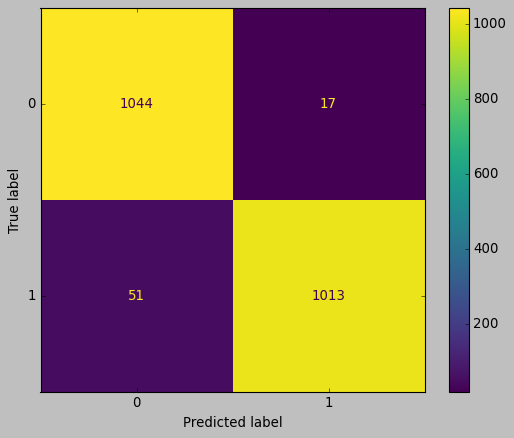

In [141]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

# Model Building using Naive Baiyes


In [145]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(x_train, y_train) 
predicted_naive = model_naive.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes:{:.2f}% ".format(score_naive*100))

Accuracy with Naive-bayes:95.44% 


In [148]:
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1061
           1       0.97      0.94      0.95      1064

    accuracy                           0.95      2125
   macro avg       0.95      0.95      0.95      2125
weighted avg       0.95      0.95      0.95      2125



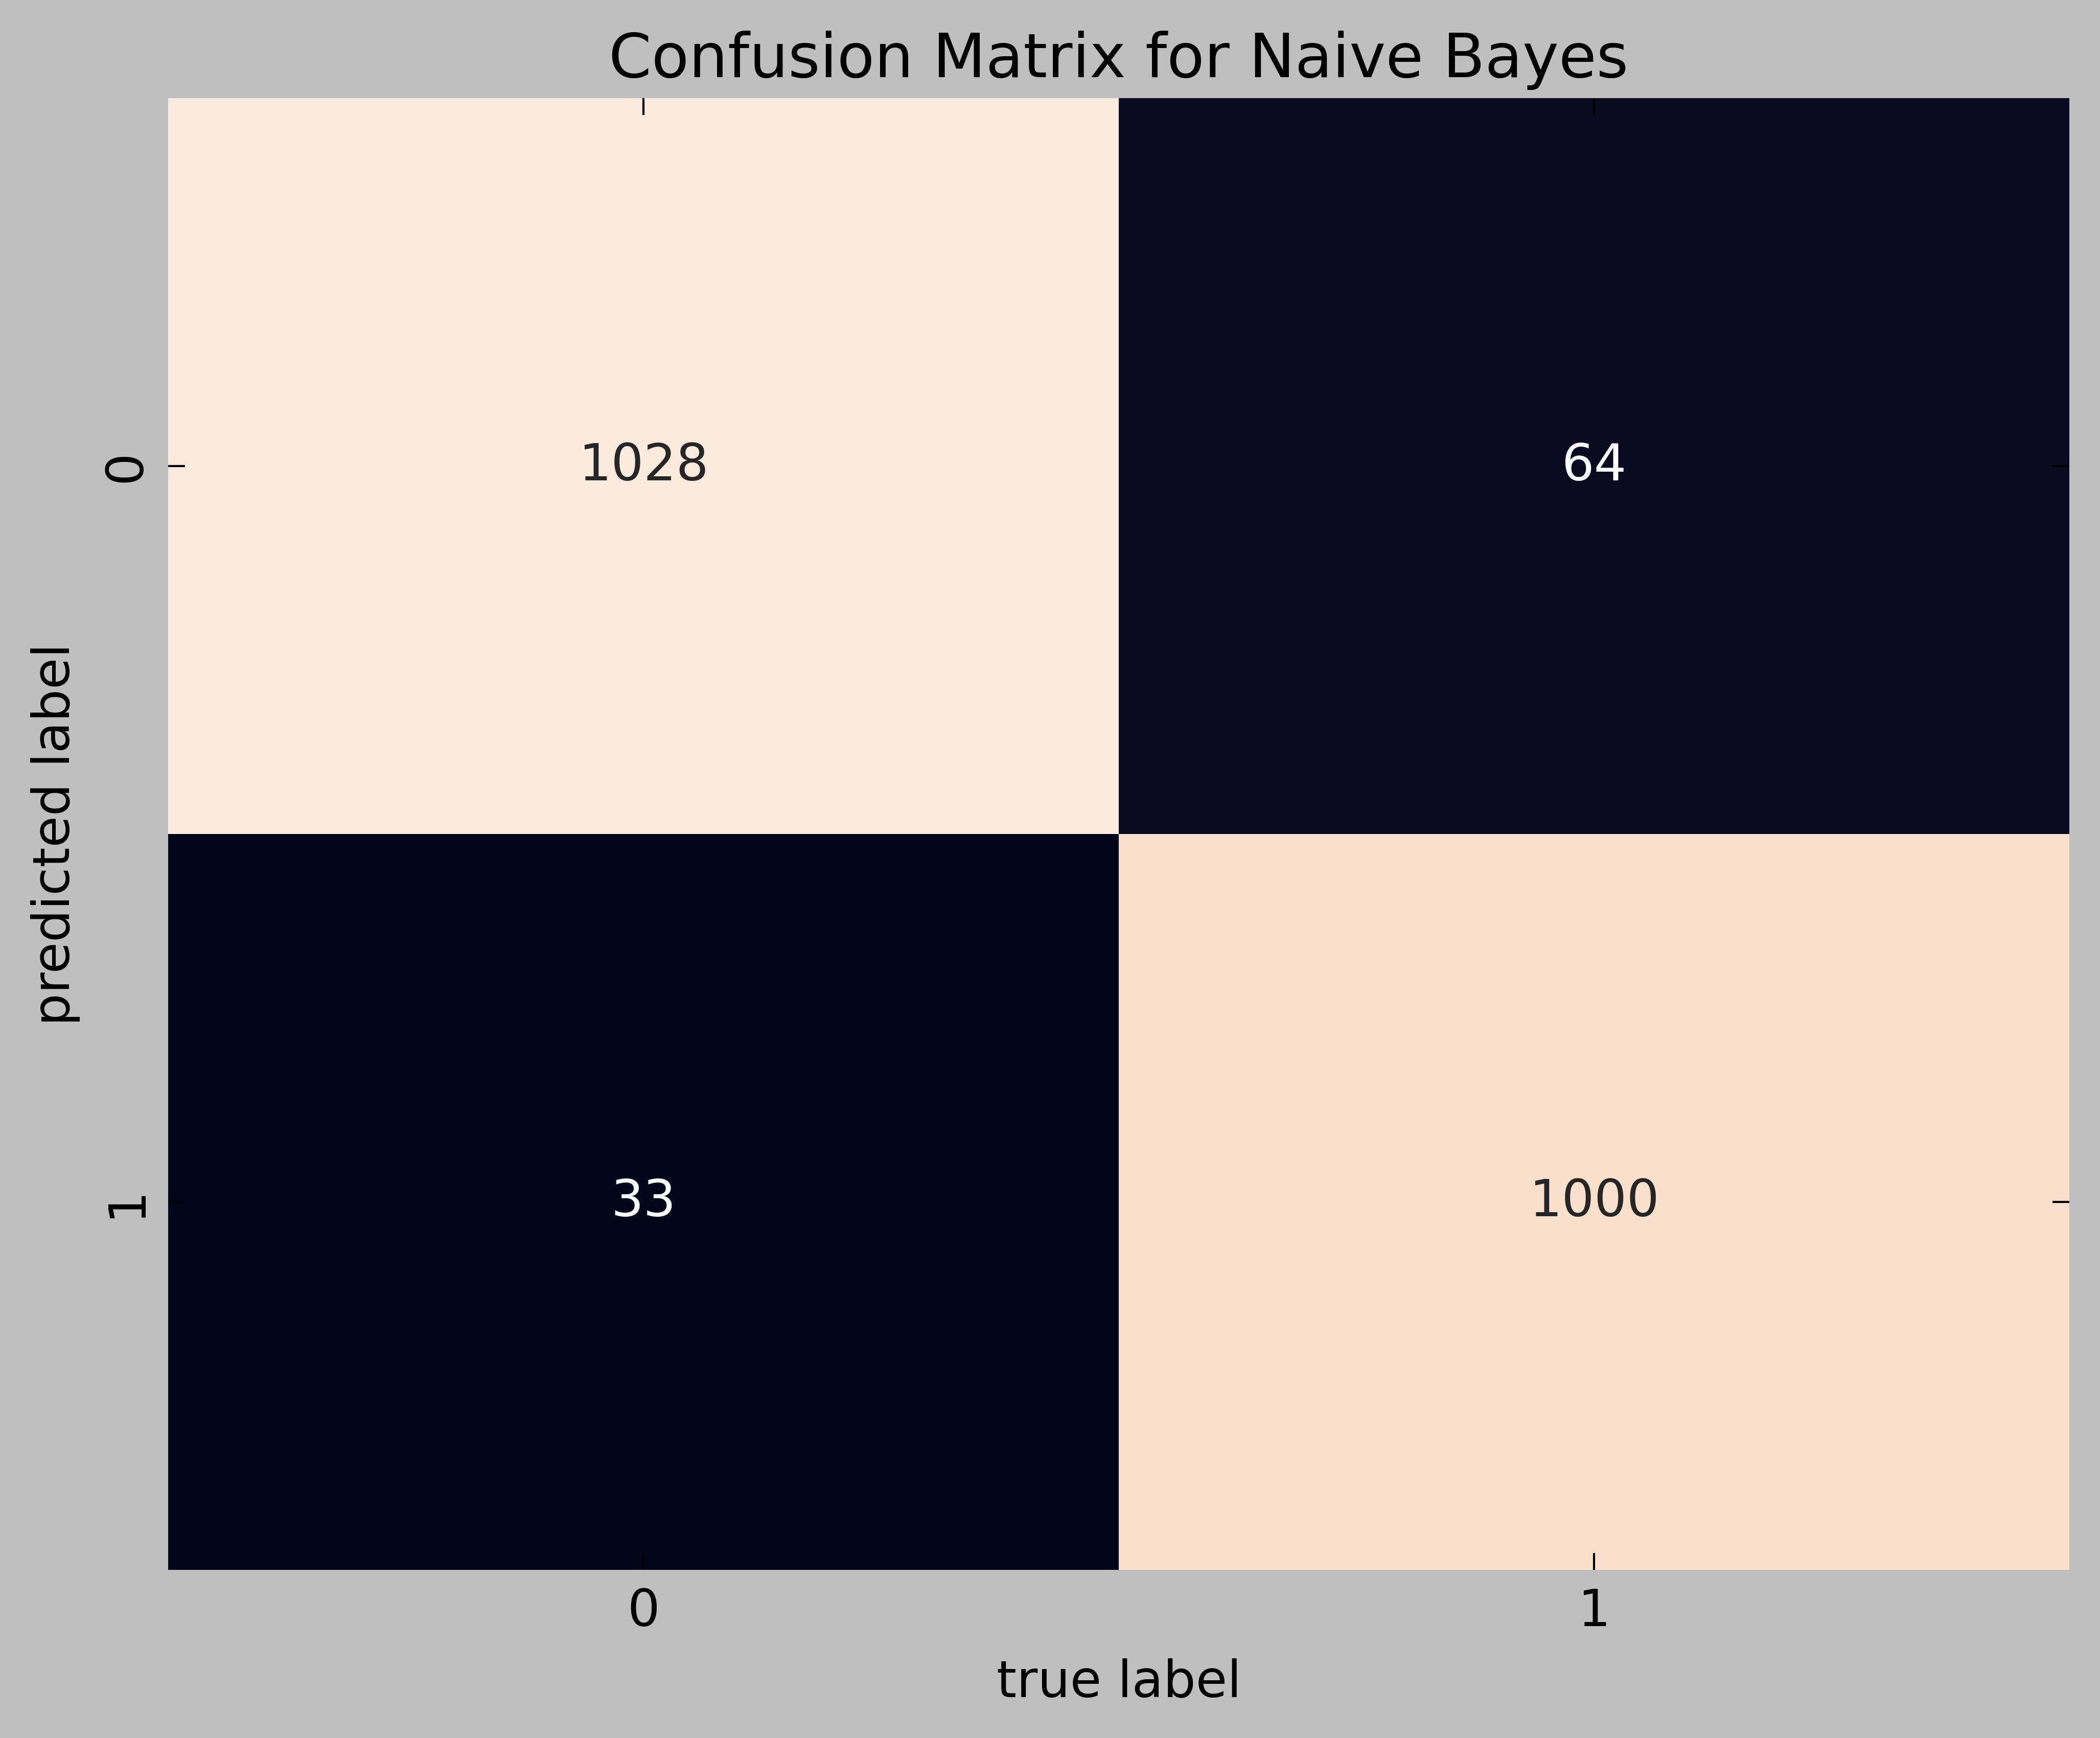

In [152]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

# Model Building using Support Vector Machine(SVM)

In [155]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train, y_train).predict_proba(x_test)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test)

In [156]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  97.2235294117647 %


In [157]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [158]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1061
           1       0.98      0.96      0.97      1064

    accuracy                           0.97      2125
   macro avg       0.97      0.97      0.97      2125
weighted avg       0.97      0.97      0.97      2125

